In [29]:
# !pip install efficient_apriori
!pip install mlxtend

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

import warnings 
warnings.filterwarnings('ignore')


In [31]:

ds = pd.read_csv('Online Retail.csv')

# Data Understanding

In [32]:
ds.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [33]:
ds['InvoiceNo'].nunique()

25900

In [34]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [35]:
ds.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [36]:
ds.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Data Exploration

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

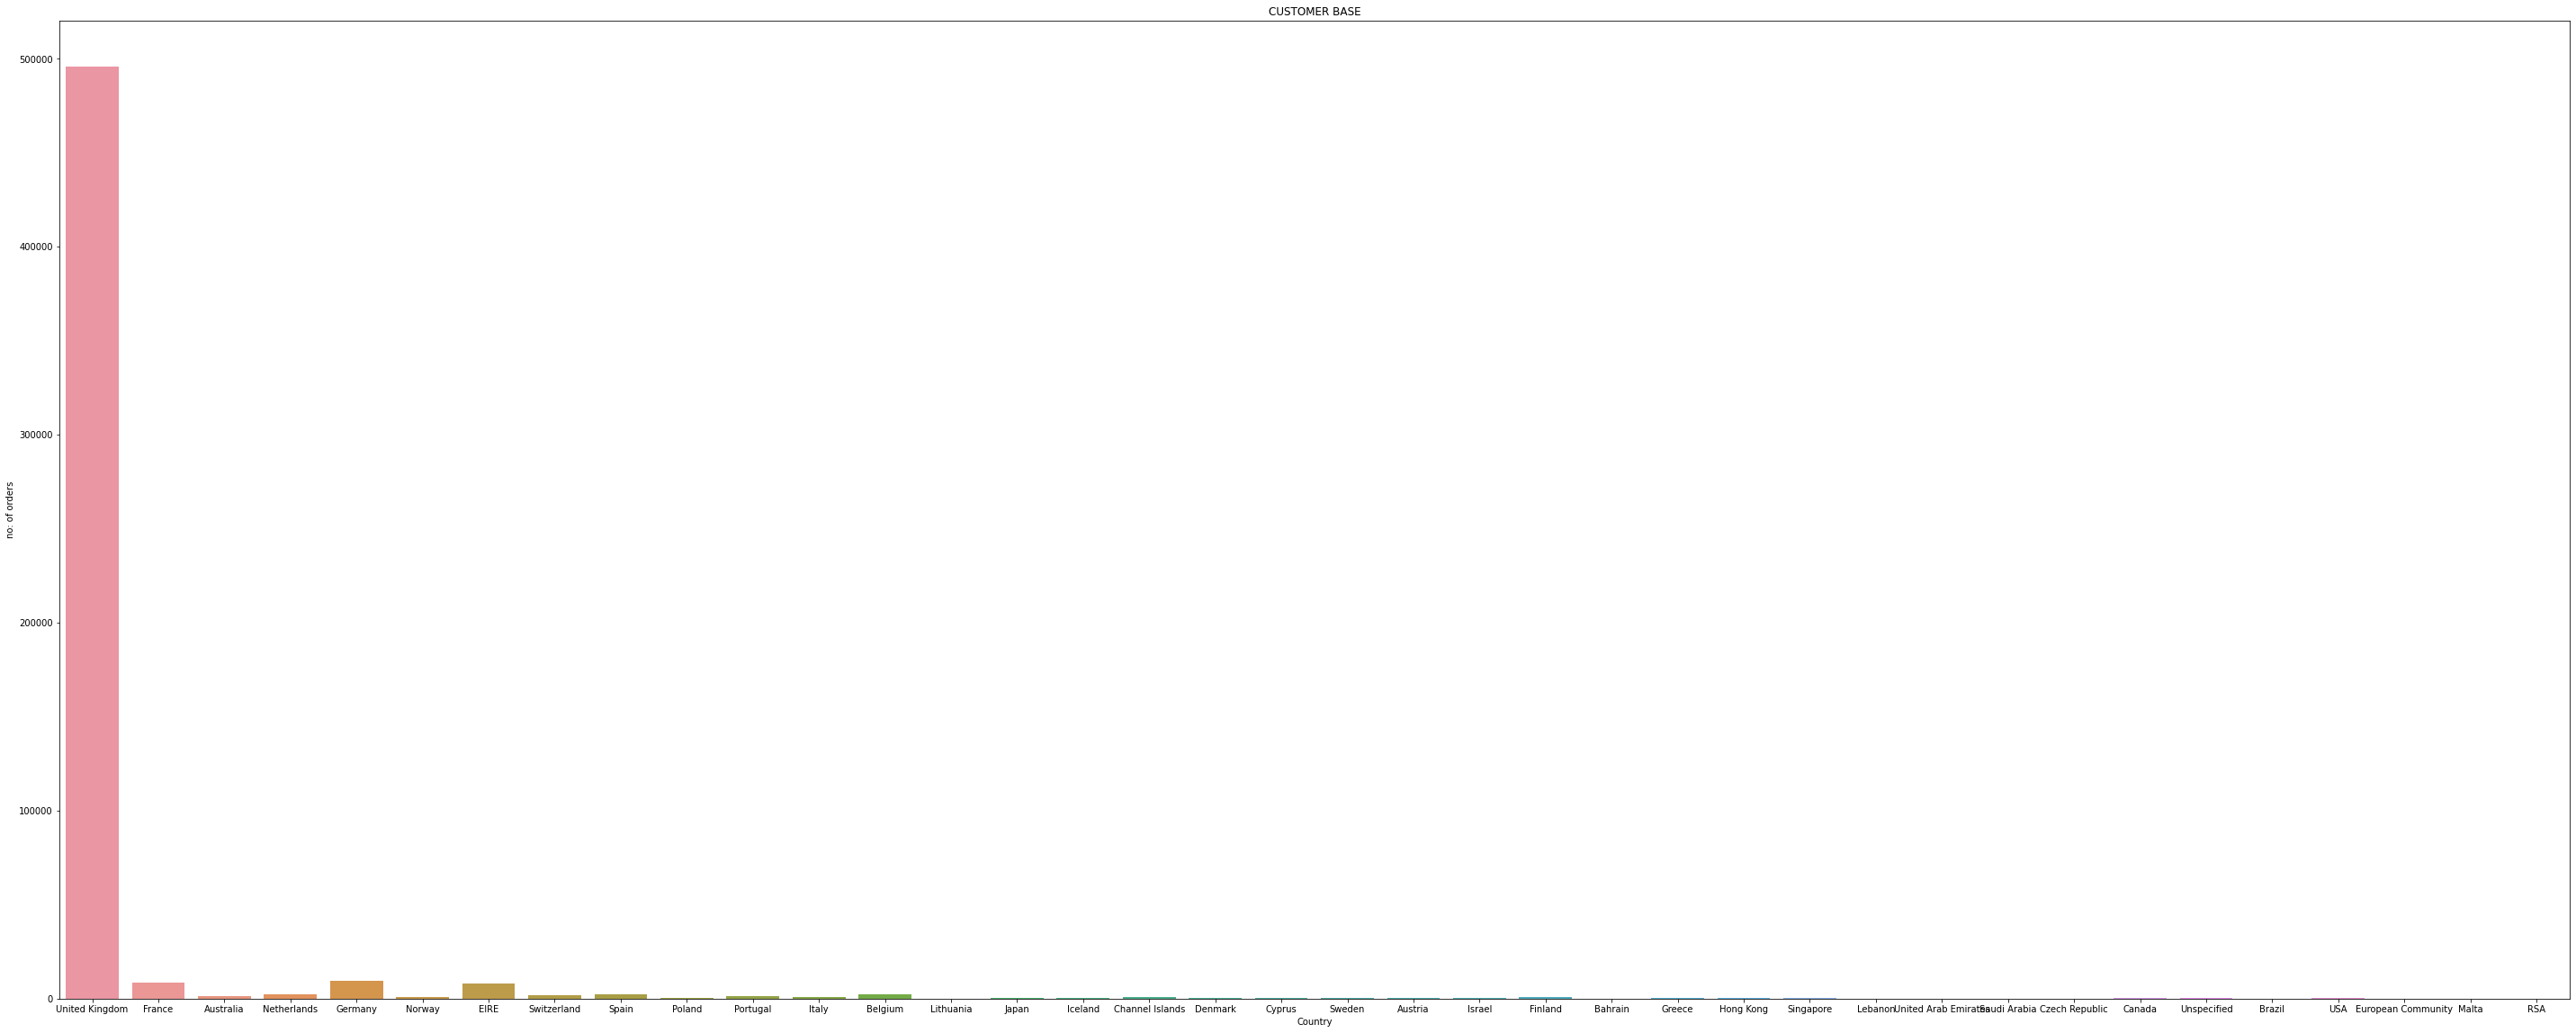

In [37]:
plt.figure(figsize=(50,20))
sns.countplot(ds['Country']);
plt.title('CUSTOMER BASE')
plt.xlabel('Country')
plt.ylabel('no: of orders')

print(ds['Country'].value_counts())

United-Kingdom has the highest number of orders.

Better Understanding on other countries(without UK) 

In [38]:
without_UK  = ds[~ds['Country'].str.contains('United Kingdom')]

Text(0, 0.5, 'no: of orders')

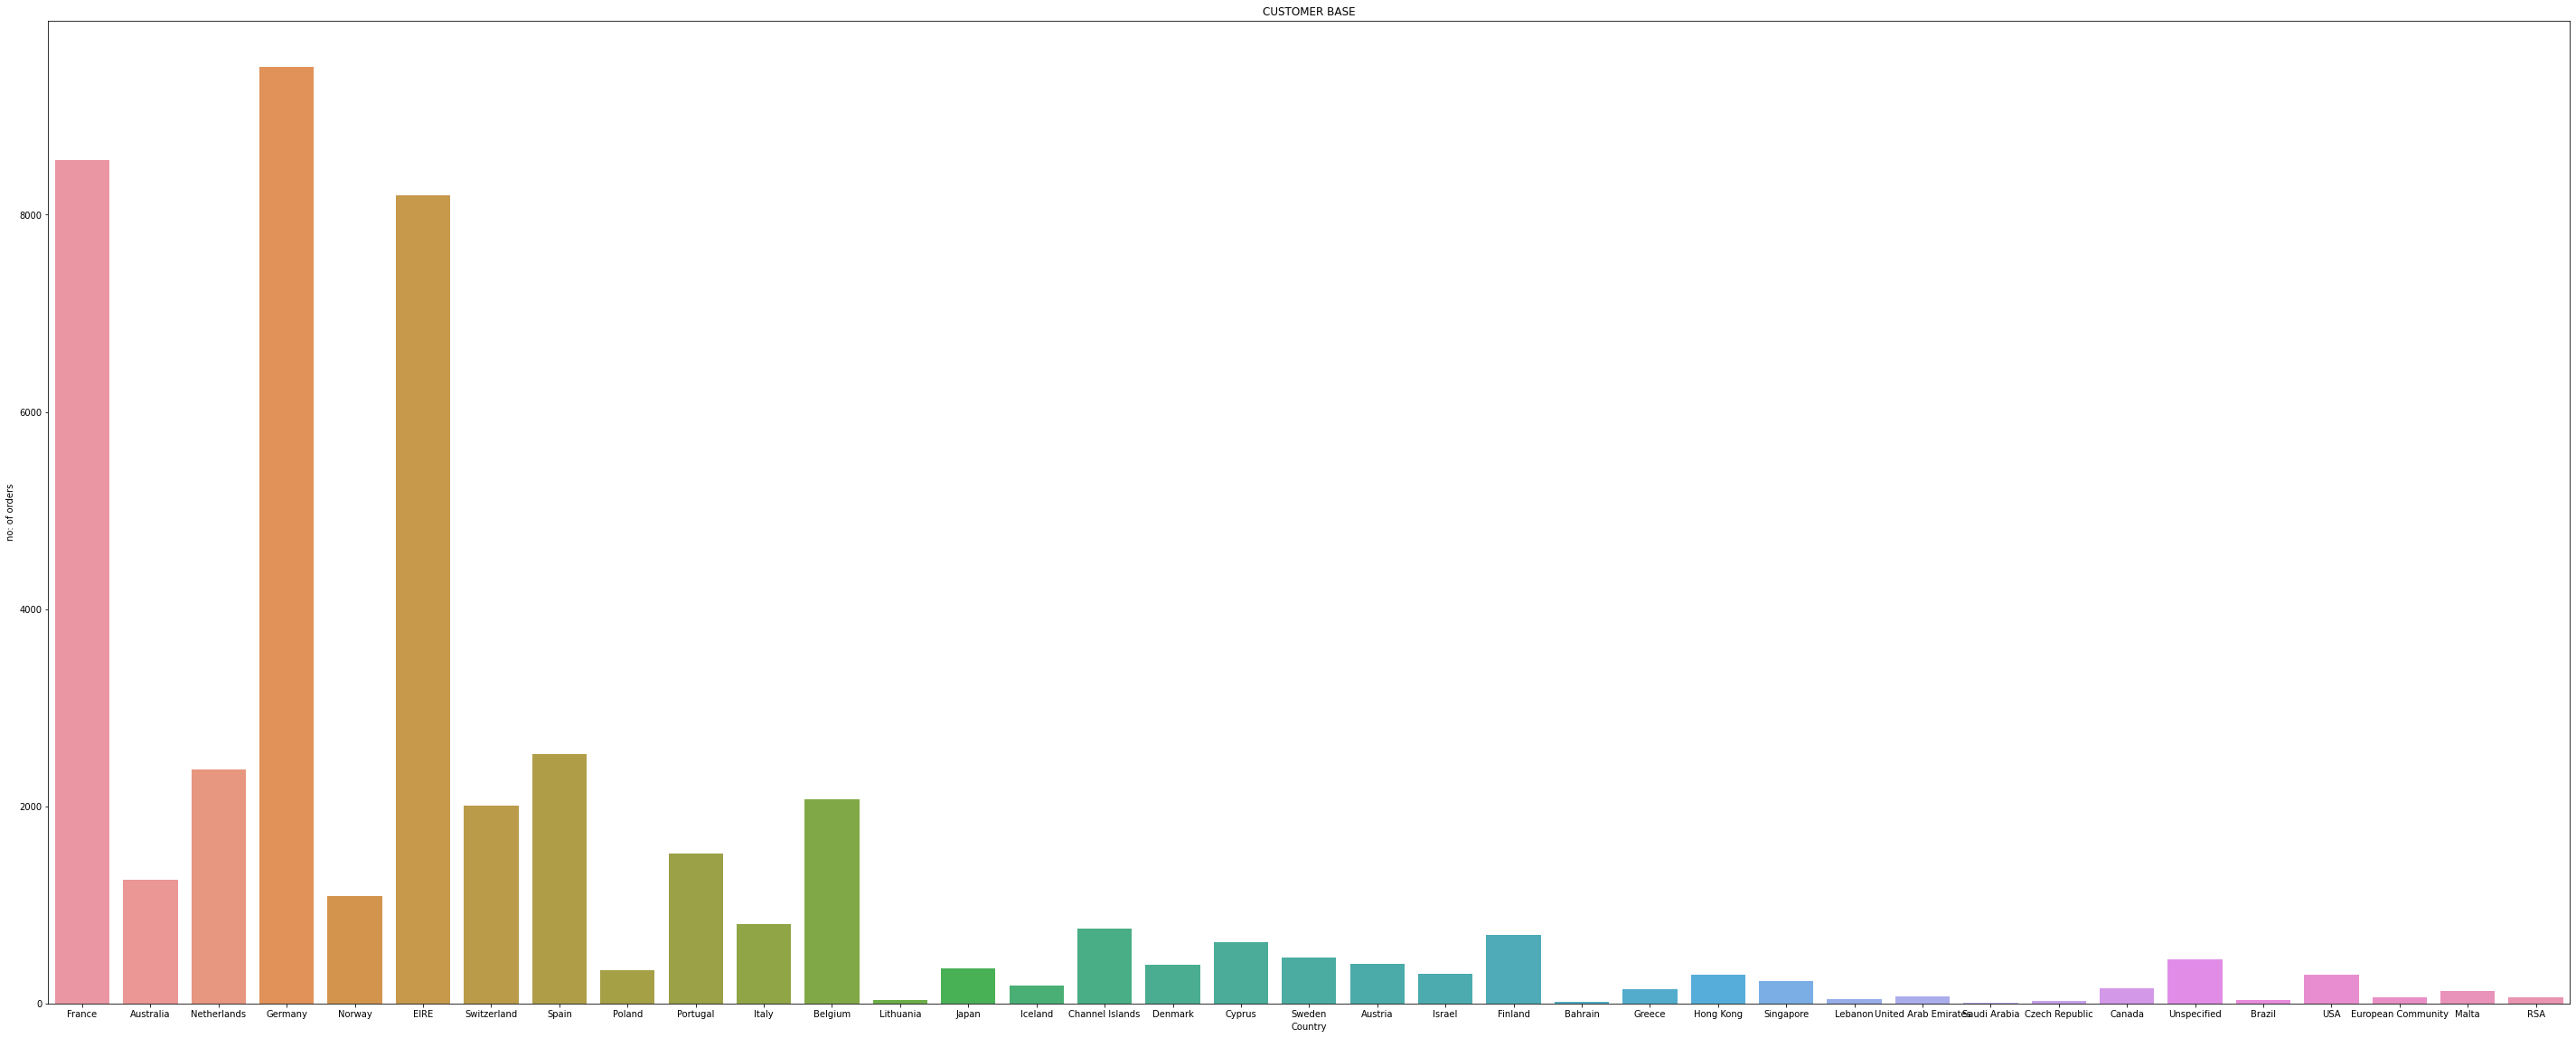

In [39]:
plt.figure(figsize=(50,20))
sns.countplot(without_UK['Country']);
plt.title('CUSTOMER BASE')
plt.xlabel('Country')
plt.ylabel('no: of orders')

France, germany and EIRE are the  3 countries other than france with more no.of orders.

# Data Preprocessing

In [40]:
# Stripping extra spaces in the description
ds['Description'] = ds['Description'].str.strip()
 
# Converting Datatypes to string
ds['InvoiceNo'] = ds['InvoiceNo'].astype('str')
 
# Dropping all cancelled transactions 
ds = ds[~ds['InvoiceNo'].str.contains('C')]


pd.set_option('display.max_columns', None)

In [41]:
ds['InvoiceNo'].dtypes

dtype('O')

In [42]:
ds.dropna

<bound method DataFrame.dropna of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899          CHILDREN'S APRON DOLLY GIRL         6   
541906    581587     23254         CHILDRENS CUTLERY DOLLY GIRL         4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138         BAKING SET 9 PIECE RETROSPOT         3   

          InvoiceDate  UnitPrice  Custome

In [43]:
ds['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2327
JUMBO BAG RED RETROSPOT               2115
REGENCY CAKESTAND 3 TIER              2019
PARTY BUNTING                         1707
LUNCH BAG RED RETROSPOT               1594
                                      ... 
WRAP  PINK FLOCK                         1
LILAC FEATHERS CURTAIN                   1
GREEN WITH METAL BAG CHARM               1
WHITE WITH METAL BAG CHARM               1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Description, Length: 4195, dtype: int64

In [44]:
country_list = ds["Country"].unique().tolist()
for n, i in enumerate(country_list):
    print(n,i)

0 United Kingdom
1 France
2 Australia
3 Netherlands
4 Germany
5 Norway
6 EIRE
7 Switzerland
8 Spain
9 Poland
10 Portugal
11 Italy
12 Belgium
13 Lithuania
14 Japan
15 Iceland
16 Channel Islands
17 Denmark
18 Cyprus
19 Sweden
20 Finland
21 Austria
22 Bahrain
23 Israel
24 Greece
25 Hong Kong
26 Singapore
27 Lebanon
28 United Arab Emirates
29 Saudi Arabia
30 Czech Republic
31 Canada
32 Unspecified
33 Brazil
34 USA
35 European Community
36 Malta
37 RSA


In [45]:
basket_list = []
for country in country_list:
    basket = (ds[ds['Country'] ==country]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
    basket_list.append(basket)

In [46]:
# Defining the hot encoding function to make the data suitable for the concerned libraries
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1
 
# Encoding the datasets
basket_encoded_list = [basket.applymap(hot_encode) for basket in basket_list]

In [47]:
pd.set_option('display.max_columns', None)

We are applying apriori algorithm only the countries with top 4 no.of orders, say, United-Kingdom, France, Germany and EIRE 

In [48]:
n = 0
frq = apriori(basket_encoded_list[n], min_support = 0.01, use_colnames = True)
print(country_list[n])
rules = association_rules(frq, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head()

United Kingdom


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
116,(BEADED CRYSTAL HEART PINK ON STICK),(DOTCOM POSTAGE),0.011035,0.037926,0.010767,0.975728,25.727250,0.010349,39.637454
2018,"(JAM MAKING SET PRINTED, SUKI SHOULDER BAG)",(DOTCOM POSTAGE),0.011624,0.037926,0.011196,0.963134,25.395168,0.010755,26.096261
2296,"(HERB MARKER MINT, HERB MARKER THYME)",(HERB MARKER ROSEMARY),0.010714,0.012374,0.010231,0.955000,77.177229,0.010099,21.947242
2300,"(HERB MARKER PARSLEY, HERB MARKER ROSEMARY)",(HERB MARKER THYME),0.011088,0.012321,0.010553,0.951691,77.244192,0.010416,20.444965
2302,"(HERB MARKER PARSLEY, HERB MARKER THYME)",(HERB MARKER ROSEMARY),0.011088,0.012374,0.010553,0.951691,76.909802,0.010416,20.443856


In [49]:
n = 1
frq = apriori(basket_encoded_list[n], min_support = 0.1, use_colnames = True)
print(country_list[n])
rules = association_rules(frq, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head()

France


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
41,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122
43,"(SET/6 RED SPOTTY PAPER PLATES, POSTAGE)",(SET/6 RED SPOTTY PAPER CUPS),0.107143,0.137755,0.102041,0.952381,6.913580,0.087281,18.107143
34,(STRAWBERRY LUNCH BOX WITH CUTLERY),(POSTAGE),0.122449,0.765306,0.114796,0.937500,1.225000,0.021085,3.755102
26,(ROUND SNACK BOXES SET OF4 WOODLAND),(POSTAGE),0.158163,0.765306,0.147959,0.935484,1.222366,0.026916,3.637755
40,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041


In [50]:

n = 4
frq = apriori(basket_encoded_list[n], min_support = 0.01, use_colnames = True)
print(country_list[n])
rules = association_rules(frq, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head()

Germany


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29720,"(PACK OF 6 SKULL PAPER CUPS, PACK OF 20 SKULL ...","(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTT...",0.010941,0.010941,0.010941,1.0,91.4,0.010821,inf
29721,"(PACK OF 6 SKULL PAPER CUPS, PACK OF 6 SKULL P...","(PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPO...",0.010941,0.010941,0.010941,1.0,91.4,0.010821,inf
29724,"(PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPO...","(PACK OF 6 SKULL PAPER CUPS, PACK OF 6 SKULL P...",0.010941,0.010941,0.010941,1.0,91.4,0.010821,inf
29725,"(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTT...","(PACK OF 6 SKULL PAPER CUPS, PACK OF 20 SKULL ...",0.010941,0.010941,0.010941,1.0,91.4,0.010821,inf
34642,"(STORAGE TIN VINTAGE DOILY, STORAGE TIN VINTAG...","(ROUND STORAGE TIN VINTAGE LEAF, SET OF 4 KNIC...",0.010941,0.010941,0.010941,1.0,91.4,0.010821,inf


In [51]:
n = 6
frq = apriori(basket_encoded_list[n], min_support = 0.02, use_colnames = True)
print(country_list[n])
rules = association_rules(frq, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head()

EIRE


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13987,"(PACK OF 60 PINK PAISLEY CAKE CASES, REGENCY T...","(REGENCY TEA PLATE GREEN, REGENCY TEA PLATE RO...",0.020833,0.027778,0.020833,1.0,36.0,0.020255,inf
5183,"(REGENCY TEA PLATE PINK, PACK OF 60 PINK PAISL...","(REGENCY TEA PLATE GREEN, SET OF 60 PANTRY DES...",0.020833,0.034722,0.020833,1.0,28.8,0.020110,inf
5211,"(REGENCY TEA PLATE PINK, PACK OF 60 PINK PAISL...","(REGENCY TEA PLATE ROSES, SET OF 60 PANTRY DES...",0.020833,0.034722,0.020833,1.0,28.8,0.020110,inf
13941,"(ROSES REGENCY TEACUP AND SAUCER, REGENCY TEA ...","(REGENCY CAKESTAND 3 TIER, SET OF 60 PANTRY DE...",0.020833,0.034722,0.020833,1.0,28.8,0.020110,inf
13973,"(PACK OF 60 PINK PAISLEY CAKE CASES, REGENCY T...","(REGENCY TEA PLATE GREEN, SET OF 60 PANTRY DES...",0.020833,0.034722,0.020833,1.0,28.8,0.020110,inf
